<a href="https://colab.research.google.com/github/drewbecker02/projects/blob/main/Plotted_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-12-15 01:37:59--  https://cobweb.cs.uga.edu/~khaled/ECcourse/TSPDATA.txt
Resolving cobweb.cs.uga.edu (cobweb.cs.uga.edu)... 128.192.101.139
Connecting to cobweb.cs.uga.edu (cobweb.cs.uga.edu)|128.192.101.139|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2446 (2.4K) [text/plain]
Saving to: ‘TSPDATA.txt.2’

TSPDATA.txt.2       100%[===================>]   2.39K  --.-KB/s    in 0s      

2022-12-15 01:37:59 (166 MB/s) - ‘TSPDATA.txt.2’ saved [2446/2446]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min   	avg   	max   	std    
0  	200   	587995	630497	678458	17926.2
1  	187   	566742	612675	671264	19101.3
2  	189   	558924	601372	663238	20242.2
3  	182   	549210	589299	667070	24483.8
4  	184   	534486	577036	649583	25000.1
5  	183   	525427	571815	655596	27210.6
6  	179   	510778	559839	668502	29837.1
7  	188   	510778	547237	653038	28453.3
8  	186   	506120	543413	650519	33416.2
9  	188   	499959	528128	659995	30457.4
10 	188   	491575	517631	647190	24787.6
11 	183   	482717	512144	638653	24370.4
12 	184   	480662	513099	635264	26153.6
13 	181   	471703	508208	636111	33594.5
14 	189   	468710	498426	641413	30383.5
15 	183   	462778	493348	656109	30697.6
16 	185   	458319	484965	635133	27912.9
17 	182   	452045	481588	634770	34108  
18 	186   	450495	478189	627108	28902.4
19 	180   	439787	481371	658322	45230.2
20 	177   	438180	467601	651821	32208.4
21 	189   	431792	465106	640715	26868.4
22 	192   	431792	465659	649842	36058.7
23 	177   	425802	463352	625807	39234.4


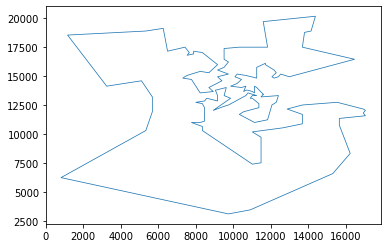

In [3]:
""" Traveling Salesman:
This project is a genetic algorithm used to solve a travelling salesman problem 
gathered from https://cobweb.cs.uga.edu/~khaled/ECcourse/TSPDATA.txt. It creates
a plot that shows the finished map, a course of minimum distance connecting
all the cities listed in the file."""

!pip install deap
!wget --no-check-certificate https://cobweb.cs.uga.edu/~khaled/ECcourse/TSPDATA.txt
!pip install matplotlib

import deap
from deap import creator
from deap import base
from deap import tools
from deap import algorithms
import math
import random
import numpy
import matplotlib.pyplot as plt

NGEN = 1500 #Generations
IND_SIZE = 127 #Number of cities
PATH = 'TSPDATA.txt' #path to text file
coordinates = [] #Initializing coordinate list that stores coordinates as cities
CXPB = 0.8 #Crossover Probability
MUTPB = 0.6 #Mutation Probability
POP_SIZE = 200 # Population size
gens_passed = 0


def createcoordinates(txtfile):
    """Creates a list of X and Y coordinates for each city. arg: txtfile, a txt file with city coordinates from TSPDATA.txt, 
        returns List of Duples"""
    global coordinates
    #Reading data from file
    with open(txtfile) as f:
        lines = f.readlines()
    #remove the labels
    count = 0
    while count < 2:
        rm_elements = lines.pop(0)
        count = count + 1
    #creating coordinate list
    for line in lines:
        line = line.rstrip('\n')
        line = line.split()
        coordinates.append((int(line[1]), int(line[2])))
    return coordinates

def getX(ID):
    """gets the X coordinate of a city in the list"""
    return coordinates[int(ID)][0]

def getY(ID):
    """gets the Y coordinate of a city in the list"""
    return coordinates[int(ID)][1]

def calcDistance(city1, city2):
    """Calculates distance between 2 cities"""
    return math.sqrt(((getX(city1) - getX(city2))**2) + ((getY(city1) - getY(city2))**2))

def evaluate(individual):
    """evaluation function, takes in a list of integers of length = IND_SIZE, and returns total distance travelled as a duple"""
    sum = 0.0
    for i in range(IND_SIZE):
        if i == IND_SIZE-1:
            sum += calcDistance(individual[0], individual[i])
        else:
            sum += calcDistance(individual[i], individual[i + 1])
    return (sum,)

def mutInvertandSwap(ind, indpb):
    min = random.randint(0, IND_SIZE)
    max = random.randint(0, IND_SIZE)
    if max <= min:
        x = max
        max = min
        min = x
    ind[min:max] = ind[min:max][::-1]
    if random.random() <= 1/20:
         tools.mutShuffleIndexes(ind, indpb)
    return (ind,)
    


def createEA():
    """Creates and runs the Evolutionary Algorithm. Much of the code was gathered from https://deap.readthedocs.io/"""
    global MUTPB, CXPB
    #Making containers
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    #initialize and populate toolbox for individuals
    toolbox = base.Toolbox()
    toolbox.register("indices", random.sample, range(int(IND_SIZE)), int(IND_SIZE))
    toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
    #Set operators
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", mutInvertandSwap, indpb= .5)
    toolbox.register("select", tools.selTournament, tournsize=20)
    toolbox.register("evaluate", evaluate)
    
    #making population
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    pop = toolbox.population(n=POP_SIZE)
    hof = tools.HallOfFame(POP_SIZE)
    


    #Registering descriptive statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min)
    stats.register("avg", numpy.mean)
    stats.register("max", numpy.max)
    stats.register("std", numpy.std)

    log = deap.tools.Logbook()

    #Aglorithm for running Simple EA
    algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

    best_ind = hof[0]

    #Printing best individual and their fitness
    print ("Best Individual: ", hof[0])
    print ("Fitness: ", hof[0].fitness)
    drawPlot(hof[0])

def drawPlot(individual):
    x =[]
    y= []
    [x.append(getX(ID)) for ID in individual]
    [y.append(getY(ID)) for ID in individual]
    x.append(getX(individual[0]))
    y.append(getY(individual[0]))
    plt.plot(x, y, markersize =0.5, linewidth=.75)
    plt.show()

def main():
    """Main method"""
    city_map= createcoordinates(PATH)
    createEA()


main()

In [ ]:
#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

!pip install deap
!wget --no-check-certificate https://cobweb.cs.uga.edu/~khaled/ECcourse/TSPDATA.txt
!pip install matplotlib


import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
import math
import numpy
import matplotlib.pyplot as plt

MIN_VALUE = 0
MAX_VALUE = 126
MIN_STRAT = 0.5
MAX_STRAT = 3
MU, LAMBDA = 30, 200

IND_SIZE = 127 #Number of cities
PATH = 'TSPDATA.txt' #path to text file
coordinates = [] #Initializing coordinate list that stores coordinates as cities
CXPB = 0.8 #Crossover Probability
MUTPB = 0.3 #Mutation Probability
POP_SIZE = 100 # Population size
gens_passed = 0


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="i", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

def createcoordinates(txtfile):
    """Creates a list of X and Y coordinates for each city. arg: txtfile, a txt file with city coordinates from TSPDATA.txt, 
        returns List of Duples"""
    global coordinates
    #Reading data from file
    with open(txtfile) as f:
        lines = f.readlines()
    #remove the labels
    count = 0
    while count < 2:
        rm_elements = lines.pop(0)
        count = count + 1
    #creating coordinate list
    for line in lines:
        line = line.rstrip('\n')
        line = line.split()
        coordinates.append((int(line[1]), int(line[2])))
    return coordinates

def getX(ID):
    """gets the X coordinate of a city in the list"""
    return coordinates[int(ID)][0]

def getY(ID):
    """gets the Y coordinate of a city in the list"""
    return coordinates[int(ID)][1]

def calcDistance(city1, city2):
    """Calculates distance between 2 cities"""
    return math.sqrt(((getX(city1) - getX(city2))**2) + ((getY(city1) - getY(city2))**2))

def evaluate(individual):
    """evaluation function, takes in a list of integers of length = IND_SIZE, and returns total distance travelled as a duple"""
    global gens_passed
    sum = 0.0
    for i in range(IND_SIZE):
        if i == IND_SIZE - 1:
            sum += calcDistance(individual[0], individual[i])
        else:
            sum += calcDistance(individual[i], individual[i + 1])
    return (sum,)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="i",
               fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

def initES(icls, scls, size, smin, smax):
    ind1 = random.sample(range(size), size)
    ind = icls(ind1[n] for n in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind
def mutInvert(ind):
    min = random.randint(0, IND_SIZE-1)
    max = random.randint(0, IND_SIZE-1)
    if max <= min:
        x = max
        max = min
        min = x
    ind[min:max] = ind[min:max][::-1]   
    return (ind,)
    


toolbox = base.Toolbox()
toolbox.register("individual", initES, creator.Individual,
                 creator.Strategy, IND_SIZE, MIN_STRAT, 
                 MAX_STRAT)

def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", mutInvertandSwap, indpb=.05)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("evaluate", evaluate)

toolbox.decorate("mate", checkStrategy(MIN_STRAT))
toolbox.decorate("mutate", checkStrategy(MIN_STRAT))

def drawPlot(individual):
    x =[]
    y= []
    [x.append(getX(ID)) for ID in individual]
    [y.append(getY(ID)) for ID in individual]
    x.append(getX(individual[0]))
    y.append(getY(individual[0]))
    #plt.scatter(x, y, )
    plt.plot(x, y, markersize =0.5, linewidth=.75)
    plt.show()

def main():
    global MU, LAMBDA
    city_map= createcoordinates(PATH)
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
    cxpb=0.4, mutpb=0.5, ngen=2000, stats=stats, halloffame=hof)
    print (hof)
    drawPlot(hof[0])
    return pop, logbook, hof
if __name__ == "__main__":
    main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 5.2 MB/s 
--2022-11-10 16:31:49--  https://cobweb.cs.uga.edu/~khaled/ECcourse/TSPDATA.txt
Resolving cobweb.cs.uga.edu (cobweb.cs.uga.edu)... 128.192.101.139
Connecting to cobweb.cs.uga.edu (cobweb.cs.uga.edu)|128.192.101.139|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2446 (2.4K) [text/plain]
Saving to: ‘TSPDATA.txt’

TSPDATA.txt         100%[===================>]   2.39K  --.-KB/s    in 0s      

2022-11-10 16:31:49 (74.8 MB/s) - ‘TSPDATA.txt’ saved [2446/2446]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


NameError: ignored